In [67]:
import numpy as np

In [68]:
import pandas as pd

In [69]:
import matplotlib.pyplot as plt


In [70]:
df = pd.read_csv("emission.csv")
df.head()

,Ship type,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes],CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes],"CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]",Annual Time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Time spent at sea [hours],Distance Travelled by Ship(nmiles)
0,Passenger ship,31.75,3473.74,11071.53,8143.43,1098.95,946.93,882.22,2346.25,104.75,333.86,2346.25,33.1621957
1,Other ship types,57.84,722.50,2289.71,89.00,997.00,1108.00,96.00,1324.00,58.5,185.39,1324.00,12.35042735
2,Ro-pax ship,19.40,2509.00,8043.85,0.00,3365.23,3813.00,865.62,2207.00,84.95,272.35,2207.00,29.5350206
3,Ro-ro ship,48.71,2776.01,8789.82,8321.74,0.00,0.00,468.08,3635.00,63.38,200.68,3635.00,43.79946355
4,Ro-pax ship,50.15,3233.44,10366.39,10366.39,0.00,0.00,0.00,2492.00,94.85,304.1,2492.00,34.0900369


In [71]:
#Using dummy variables for ship types.
#dummies=pd.get_dummies(df['Ship type'],dtype=int)
#mergeddf= pd.concat([df,dummies],axis='columns')
#df=mergeddf
#df.head()
from sklearn.preprocessing import LabelEncoder
column_to_encode = ['Ship type']
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in column_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df

,Ship type,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes],CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes],"CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]",Annual Time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Time spent at sea [hours],Distance Travelled by Ship(nmiles)
0,10,31.75,3473.74,11071.53,8143.43,1098.95,946.93,882.22,2346.25,104.75,333.86,2346.25,33.1621957
1,9,57.84,722.50,2289.71,89.00,997.00,1108.00,96.00,1324.00,58.5,185.39,1324.00,12.35042735
2,12,19.40,2509.00,8043.85,0.00,3365.23,3813.00,865.62,2207.00,84.95,272.35,2207.00,29.5350206
3,13,48.71,2776.01,8789.82,8321.74,0.00,0.00,468.08,3635.00,63.38,200.68,3635.00,43.79946355
4,12,50.15,3233.44,10366.39,10366.39,0.00,0.00,0.00,2492.00,94.85,304.1,2492.00,34.0900369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,1,4.06,1901.51,6011.10,695.53,2478.81,2603.44,233.33,2059.90,77.31,244.39,2059.90,24.59591256
12704,0,3.12,1256.01,3930.09,0.00,2926.00,920.00,84.00,1331.00,123.37,386.02,1331.00,10.18083813
12705,0,3.39,968.91,3027.86,0.00,912.71,1982.10,133.05,1205.82,70.9,221.56,1205.82,13.66586742
12706,1,7.08,662.45,2093.51,0.00,0.00,1854.86,238.65,678.10,79.95,252.66,678.10,8.285803627


                                                    Ship type  \
Ship type                                            1.000000   
Technical efficiency                                 0.370752   
Total fuel consumption [m tonnes]                    0.280638   
Total CO₂ emissions [m tonnes]                       0.282467   
CO₂ emissions from all voyages between diffrene...   0.279655   
CO₂ emissions produced when ships depart from v...   0.132746   
CO₂ emissions from all voyages to destination p...   0.114383   
CO₂ emissions while ships are in port, either d...   0.219302   
Annual Time spent at sea [hours]                     0.262284   
Annual average Fuel consumption per distance [k...   0.105249   
Annual average CO₂ emissions per distance [kg C...   0.101864   
Time spent at sea [hours]                            0.262284   
Distance Travelled by Ship(nmiles)                   0.322476   

                                                    Technical efficiency  \
Ship type    

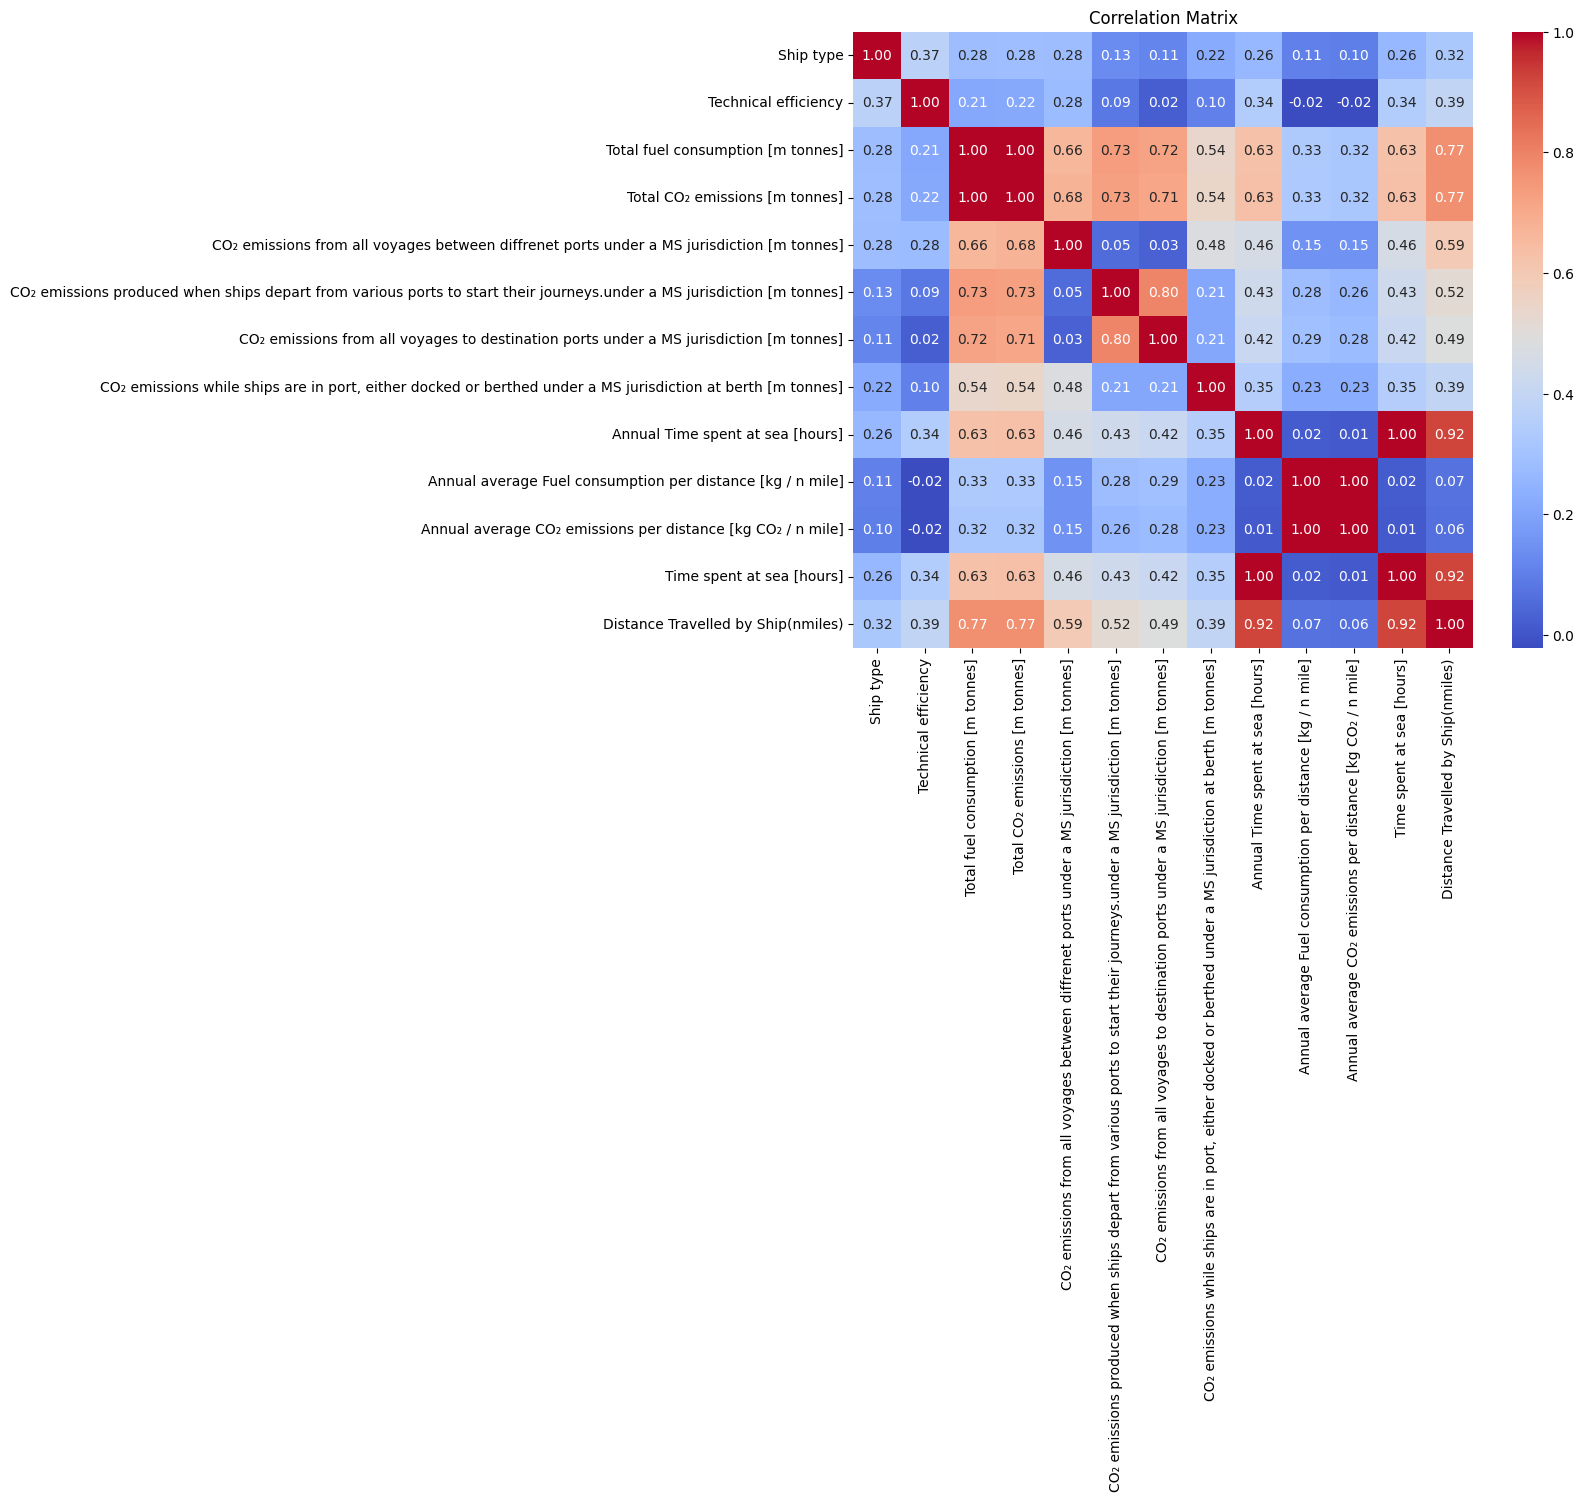

In [72]:
columns_to_check = ['Distance Travelled by Ship(nmiles)','Total fuel consumption [m tonnes]', 'Total CO₂ emissions [m tonnes]','Technical efficiency','Annual average Fuel consumption per distance [kg / n mile]','Annual average CO₂ emissions per distance [kg CO₂ / n mile]']
df[columns_to_check] = df[columns_to_check].replace(0, pd.NA)

# Drop rows containing NaN in the specific columns
df.dropna(subset=columns_to_check, inplace=True)


# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
#The correlation matrix you provided shows the correlation coefficients between the "Total fuel consumption [m tonnes]" and other features in your dataset. Here are a few observations:

#Strong Positive Correlations:
       # "Total CO₂ emissions [m tonnes]" (0.997022), "Distance Travelled by Ship(nmiles)" (0.768696), "CO₂ emissions from all voyages between different ports under a MS jurisdiction [m tonnes]" (0.662296), "CO₂ emissions produced when ships depart from various ports to start their journeys under a MS jurisdiction [m tonnes]" (0.734040), and "CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]" (0.719949) have strong positive correlations with "Total fuel consumption [m tonnes]".
        #This suggests that as "Total fuel consumption [m tonnes]" increases, these variables also tend to increase.

# Moderate Positive Correlations:
       # "Annual Time spent at sea [hours]" (0.628221), "Time spent at sea [hours]" (0.628221), and "Annual average Fuel consumption per distance [kg / n mile]" (0.330090) have moderate positive correlations with "Total fuel consumption [m tonnes]".

#Weak Positive Correlations:
        # "Ship type" (0.280

In [74]:
df = df.drop('Time spent at sea [hours]', axis='columns')
df.head()

,Ship type,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes],CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes],"CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]",Annual Time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Distance Travelled by Ship(nmiles)
0,10,31.75,3473.74,11071.53,8143.43,1098.95,946.93,882.22,2346.25,104.75,333.86,33.1621957
1,9,57.84,722.5,2289.71,89.00,997.00,1108.00,96.00,1324.00,58.5,185.39,12.35042735
2,12,19.4,2509.0,8043.85,0.00,3365.23,3813.00,865.62,2207.00,84.95,272.35,29.5350206
3,13,48.71,2776.01,8789.82,8321.74,0.00,0.00,468.08,3635.00,63.38,200.68,43.79946355
4,12,50.15,3233.44,10366.39,10366.39,0.00,0.00,0.00,2492.00,94.85,304.1,34.0900369


In [75]:
zero_count1 = (df['Total fuel consumption [m tonnes]'] == 0).sum()

zero_count2 = (df['Total CO₂ emissions [m tonnes]'] == 0).sum()

zero_count4 = (df['Annual average Fuel consumption per distance [kg / n mile]'] == 0).sum()

zero_count5 = (df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] == 0).sum()
zero_count1,zero_count2,zero_count4,zero_count5

(0, 0, 0, 0)

In [76]:
print(df.dtypes)

Ship type                                                                                                                   int32
Technical efficiency                                                                                                       object
Total fuel consumption [m tonnes]                                                                                          object
Total CO₂ emissions [m tonnes]                                                                                             object
CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]                                 float64
CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]    float64
CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]                                    float64
CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at

In [77]:
df['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(df['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = pd.to_numeric(df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'], errors='coerce')
df['Distance Travelled by Ship(nmiles)'] = pd.to_numeric(df['Distance Travelled by Ship(nmiles)'], errors='coerce')
df['Total fuel consumption [m tonnes]'] = pd.to_numeric(df['Total fuel consumption [m tonnes]'], errors='coerce')
df['Total CO₂ emissions [m tonnes]'] = pd.to_numeric(df['Total CO₂ emissions [m tonnes]'], errors='coerce')
df['Technical efficiency'] = pd.to_numeric(df['Technical efficiency'], errors='coerce')
print(df.dtypes)

Ship type                                                                                                                   int32
Technical efficiency                                                                                                      float64
Total fuel consumption [m tonnes]                                                                                         float64
Total CO₂ emissions [m tonnes]                                                                                            float64
CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]                                 float64
CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]    float64
CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]                                    float64
CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at

In [78]:
df

,Ship type,Technical efficiency,Total fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes],CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes],"CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]",Annual Time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Distance Travelled by Ship(nmiles)
0,10,31.75,3473.74,11071.53,8143.43,1098.95,946.93,882.22,2346.25,104.75,333.86,33.162196
1,9,57.84,722.50,2289.71,89.00,997.00,1108.00,96.00,1324.00,58.50,185.39,12.350427
2,12,19.40,2509.00,8043.85,0.00,3365.23,3813.00,865.62,2207.00,84.95,272.35,29.535021
3,13,48.71,2776.01,8789.82,8321.74,0.00,0.00,468.08,3635.00,63.38,200.68,43.799464
4,12,50.15,3233.44,10366.39,10366.39,0.00,0.00,0.00,2492.00,94.85,304.10,34.090037
...,...,...,...,...,...,...,...,...,...,...,...,...
12703,1,4.06,1901.51,6011.10,695.53,2478.81,2603.44,233.33,2059.90,77.31,244.39,24.595913
12704,0,3.12,1256.01,3930.09,0.00,2926.00,920.00,84.00,1331.00,123.37,386.02,10.180838
12705,0,3.39,968.91,3027.86,0.00,912.71,1982.10,133.05,1205.82,70.90,221.56,13.665867
12706,1,7.08,662.45,2093.51,0.00,0.00,1854.86,238.65,678.10,79.95,252.66,8.285804


In [79]:
from scipy import stats

# Define a function to remove outliers using z-score
def remove_outliers_zscore(df, columns):
    z_scores = stats.zscore(df[columns])
    return df[(np.abs(z_scores) < 3).all(axis=1)]

# List of columns from which you want to remove outliers
columns_to_check = ['Technical efficiency', 'Total fuel consumption [m tonnes]','Total CO₂ emissions [m tonnes]','CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]','CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]','CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]','CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]','Annual Time spent at sea [hours]','Annual average Fuel consumption per distance [kg / n mile]','Annual average CO₂ emissions per distance [kg CO₂ / n mile]']

# Remove outliers from the specified columns
df_no_outliers = remove_outliers_zscore(df, columns_to_check)
df=df_no_outliers

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns of the DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# df_normalized now contains all columns of df normalized
df = df_normalized

In [81]:
Y=df[['Total fuel consumption [m tonnes]']]

In [82]:
df.columns

Index(['Ship type', 'Technical efficiency',
       'Total fuel consumption [m tonnes]', 'Total CO₂ emissions [m tonnes]',
       'CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]',
       'Annual Time spent at sea [hours]',
       'Annual average Fuel consumption per distance [kg / n mile]',
       'Annual average CO₂ emissions per distance [kg CO₂ / n mile]',
       'Distance Travelled by Ship(nmiles)'],
      dtype='object')

In [83]:
df=df.drop('Total fuel consumption [m tonnes]',axis=1)
X=df.drop('Total CO₂ emissions [m tonnes]',axis=1)
#X=X.drop('Annual average Fuel consumption per distance [kg / n mile]',axis=1)
#X=X.drop('Annual average CO₂ emissions per distance [kg CO₂ / n mile]',axis=1)
#nee dto use double brackets to take X and Y as dataframes.
X

,Ship type,Technical efficiency,CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes],CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes],"CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]",Annual Time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Annual average CO₂ emissions per distance [kg CO₂ / n mile],Distance Travelled by Ship(nmiles)
0,0.714286,0.928792,0.309618,0.059706,0.051137,0.185586,0.352057,0.187144,0.199420,0.279569
1,0.857143,0.548089,0.000000,0.182834,0.205914,0.182094,0.331163,0.149896,0.162646,0.248900
2,0.642857,0.909679,0.000000,0.095241,0.145269,0.016198,0.335814,0.096619,0.106095,0.214161
3,0.714286,0.045931,0.064937,0.000000,0.000000,0.035576,0.098522,0.143424,0.156052,0.059906
4,0.857143,0.304254,0.004928,0.026928,0.024260,0.007865,0.052690,0.167184,0.178884,0.030562
...,...,...,...,...,...,...,...,...,...,...
11256,0.071429,0.075216,0.026444,0.134674,0.140594,0.049084,0.309090,0.135523,0.145930,0.207138
11257,0.000000,0.046239,0.000000,0.158970,0.049683,0.017670,0.199718,0.222172,0.230604,0.085254
11258,0.000000,0.054562,0.000000,0.049588,0.107040,0.027989,0.180935,0.123464,0.132281,0.114721
11259,0.071429,0.168311,0.000000,0.000000,0.100168,0.050203,0.101750,0.140489,0.150874,0.069231


In [84]:
Y

,Total fuel consumption [m tonnes]
0,0.219513
1,0.158342
2,0.090554
3,0.036378
4,0.021416
...,...
11256,0.119823
11257,0.078894
11258,0.060690
11259,0.041259


In [85]:
#now test train split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [86]:
len(X_train)
len(y_train)
len(X_test)
len(y_test)

2253

In [87]:
nan_values = df[df.isna().any(axis=1)]

# Display rows with NaN values
print(nan_values)

Empty DataFrame
Columns: [Ship type, Technical efficiency, Total CO₂ emissions [m tonnes], CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes], CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes], CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes], CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes], Annual Time spent at sea [hours], Annual average Fuel consumption per distance [kg / n mile], Annual average CO₂ emissions per distance [kg CO₂ / n mile], Distance Travelled by Ship(nmiles)]
Index: []


In [88]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [89]:
model.predict(X_test)

array([[0.22668396],
       [0.33761163],
       [0.14310732],
       ...,
       [0.05248783],
       [0.16448547],
       [0.09522253]])

In [90]:
model.score(X_test,y_test)

0.9893871379144816

In [91]:
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [0.01319445]
Coefficients: [[-9.98225917e-04  1.37237118e-03  5.23905441e-01  3.68440989e-01
   3.71041072e-01  1.02478174e-01 -5.02015365e-03  1.39682798e+00
  -1.40628088e+00  1.60364981e-02]]


In [92]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-Validation Scores:', cv_scores)

Cross-Validation Scores: [0.99780233 0.99765105 0.99172596 0.99644044 0.99538016]


In [93]:
columns = X.columns
print(columns)


Index(['Ship type', 'Technical efficiency',
       'CO₂ emissions from all voyages between diffrenet ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions produced when ships depart from various ports to start their journeys.under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages to destination ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions while ships are in port, either docked or berthed under a MS jurisdiction at berth [m tonnes]',
       'Annual Time spent at sea [hours]',
       'Annual average Fuel consumption per distance [kg / n mile]',
       'Annual average CO₂ emissions per distance [kg CO₂ / n mile]',
       'Distance Travelled by Ship(nmiles)'],
      dtype='object')


In [94]:
columns = Y.columns
print(columns)

Index(['Total fuel consumption [m tonnes]'], dtype='object')


                                                    Ship type  \
Ship type                                            1.000000   
Technical efficiency                                 0.340741   
Total CO₂ emissions [m tonnes]                       0.242139   
CO₂ emissions from all voyages between diffrene...   0.161067   
CO₂ emissions produced when ships depart from v...   0.193158   
CO₂ emissions from all voyages to destination p...   0.160569   
CO₂ emissions while ships are in port, either d...   0.229243   
Annual Time spent at sea [hours]                     0.183769   
Annual average Fuel consumption per distance [k...   0.145996   
Annual average CO₂ emissions per distance [kg C...   0.143878   
Distance Travelled by Ship(nmiles)                   0.230960   

                                                    Technical efficiency  \
Ship type                                                       0.340741   
Technical efficiency                                            1.0

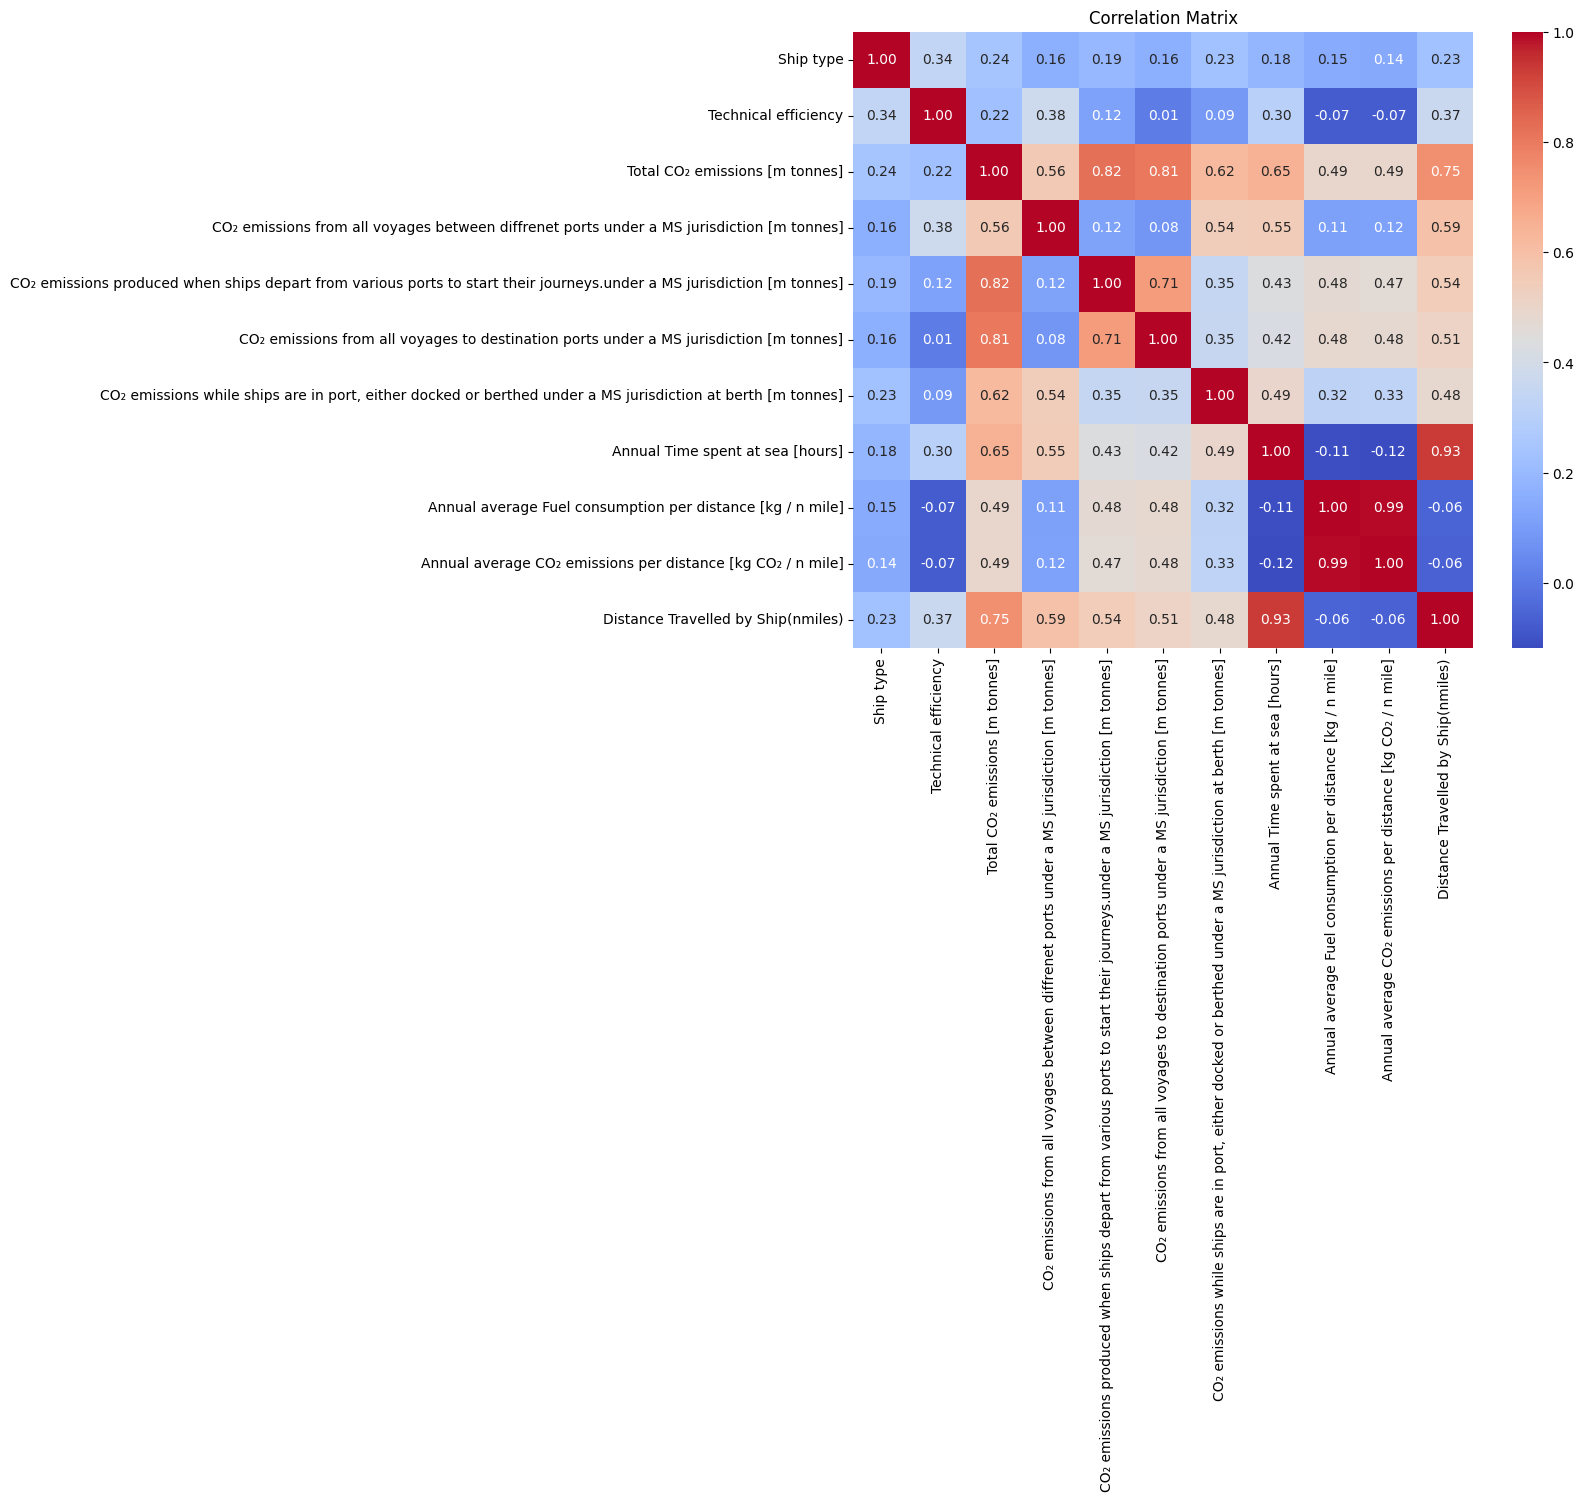

In [95]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

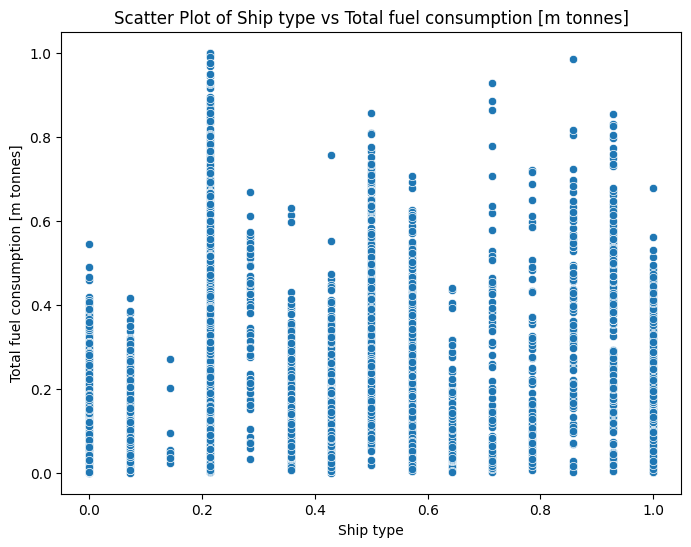

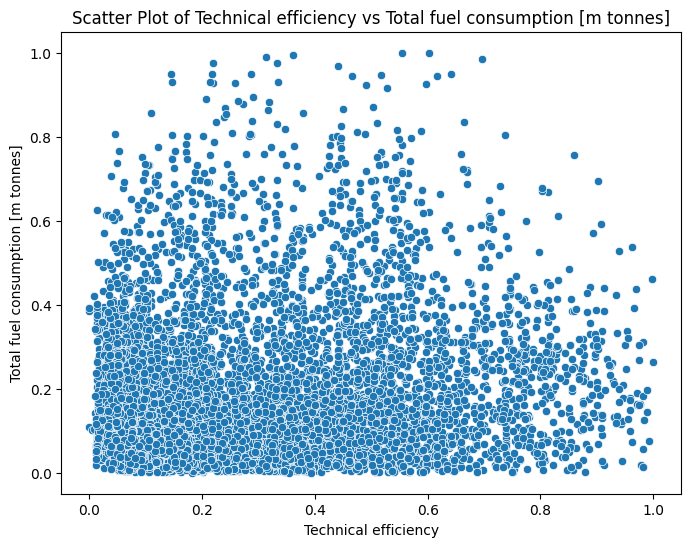

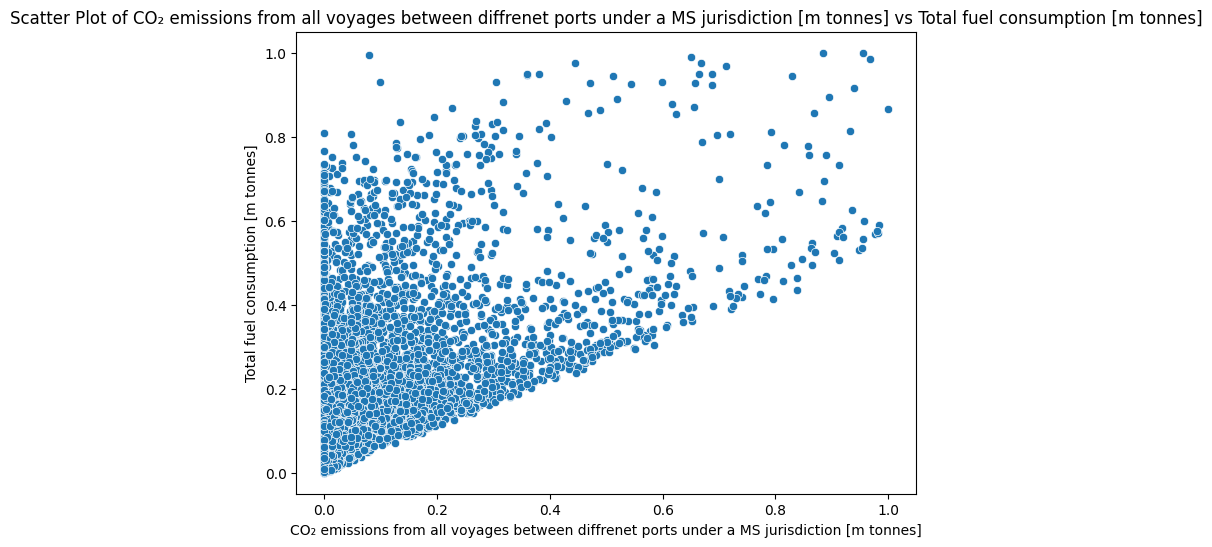

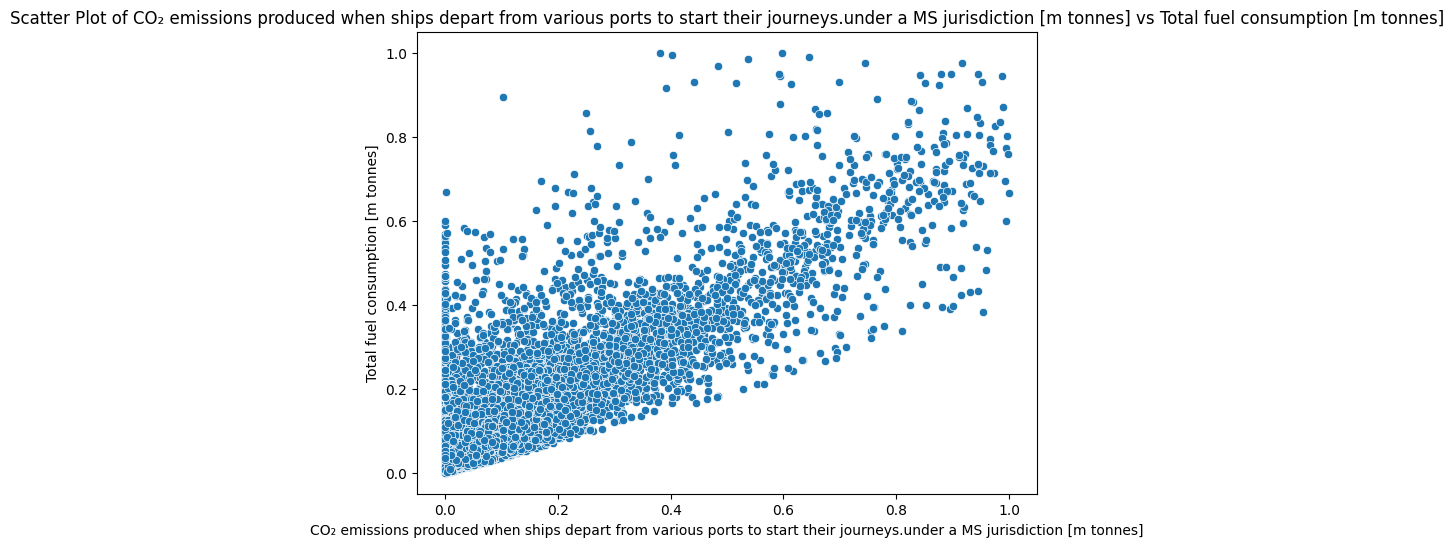

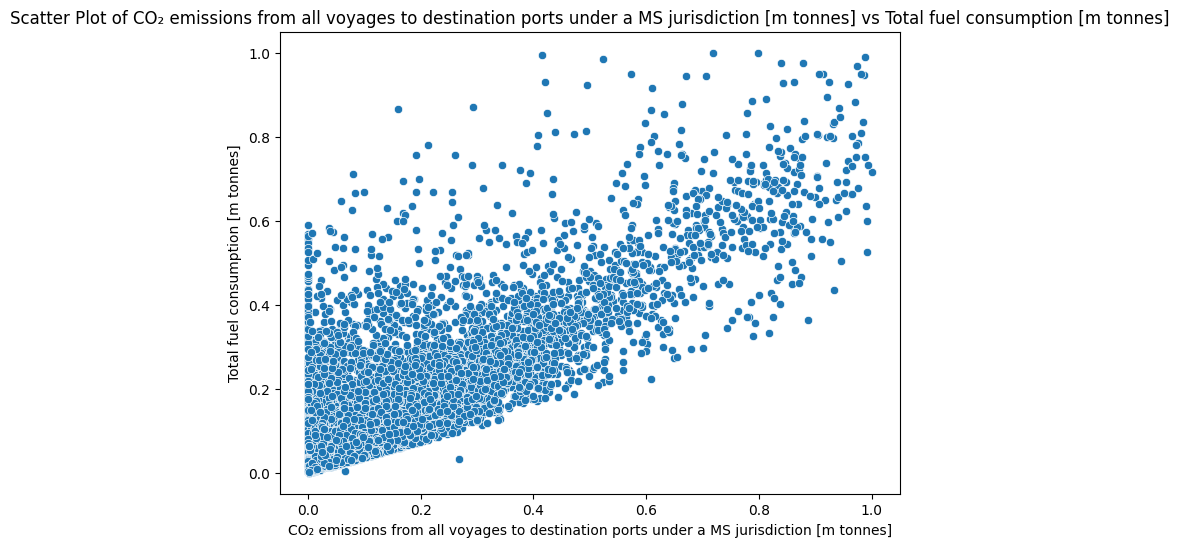

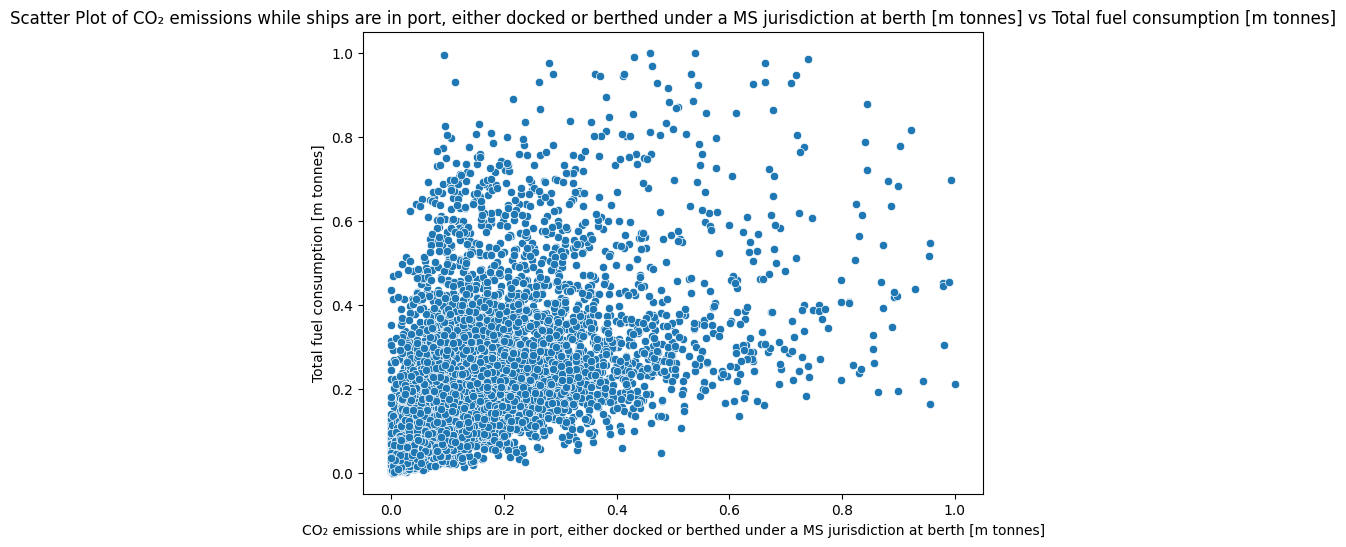

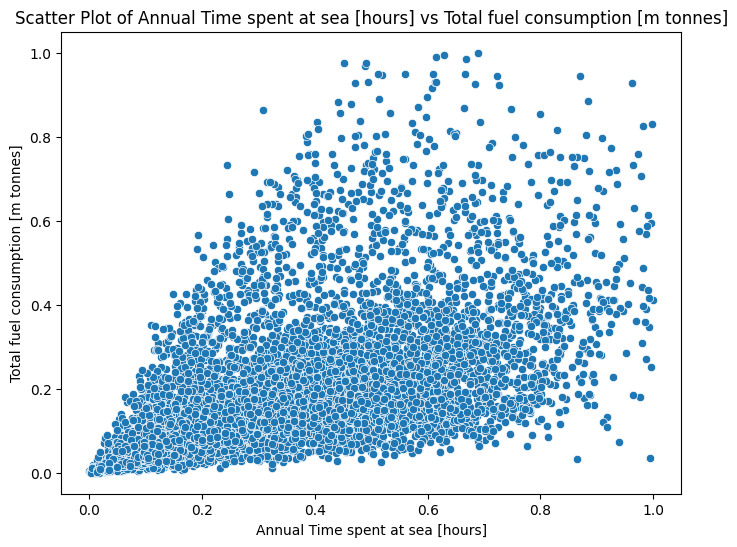

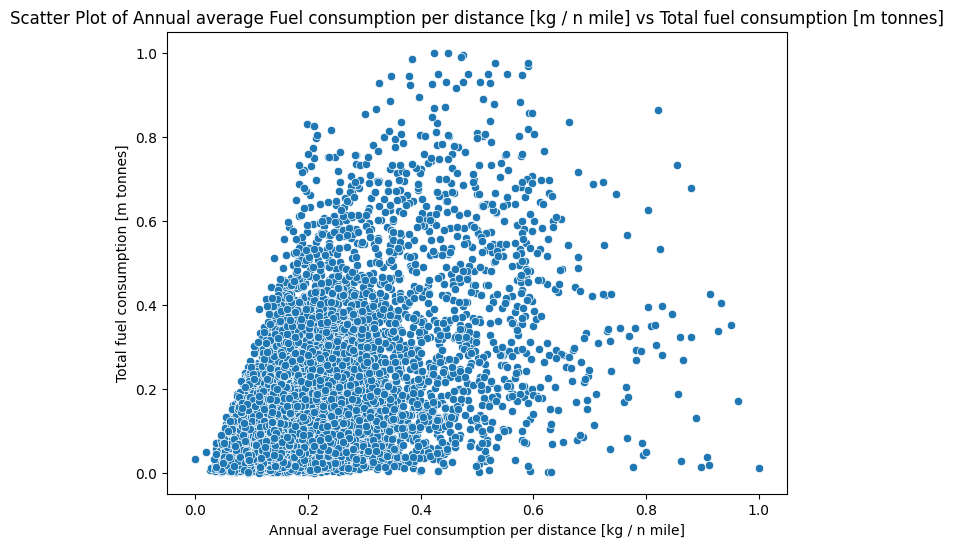

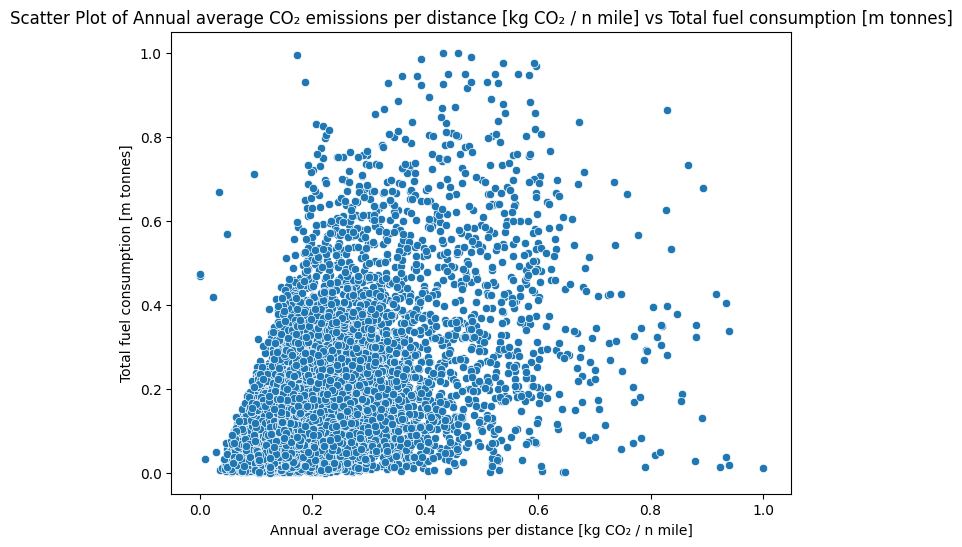

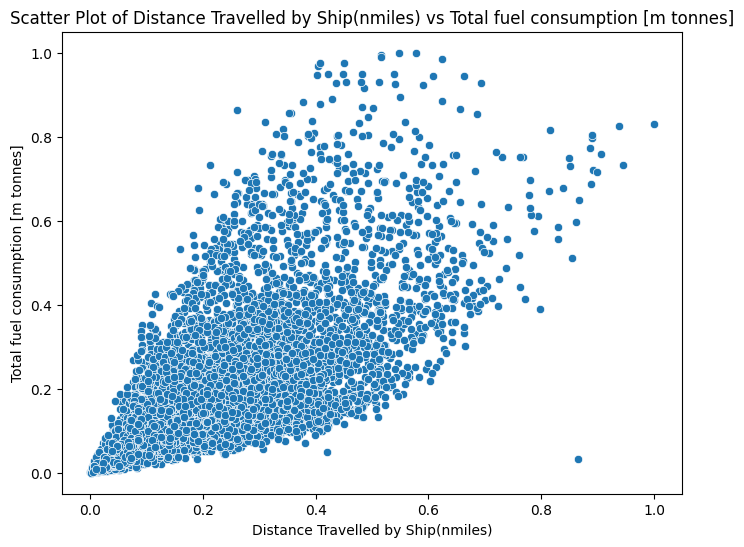

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate X1 and Y1 dataframes
df = pd.concat([X, Y], axis=1)

 #Plot scatter plots for each feature against the output column
for feature in X.columns:
     plt.figure(figsize=(8, 6))
     sns.scatterplot(data=df, x=feature, y='Total fuel consumption [m tonnes]')
     plt.title(f'Scatter Plot of {feature} vs Total fuel consumption [m tonnes]')
     plt.xlabel(feature)
     plt.ylabel('Total fuel consumption [m tonnes]')
     plt.show()


In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model2.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00045895405393123434



Model: Linear Regression
Cross-Validation R-squared scores: [0.9979436  0.99227483 0.9978377  0.99488889]
Mean R-squared (Cross-Validation): 1.00


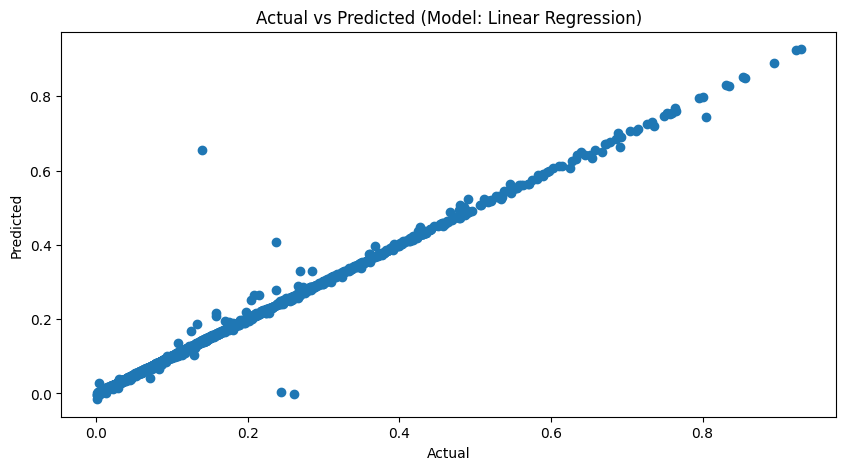


Model: Ridge Regression
Cross-Validation R-squared scores: [0.99483135 0.98115877 0.99710859 0.98636044]
Mean R-squared (Cross-Validation): 0.99


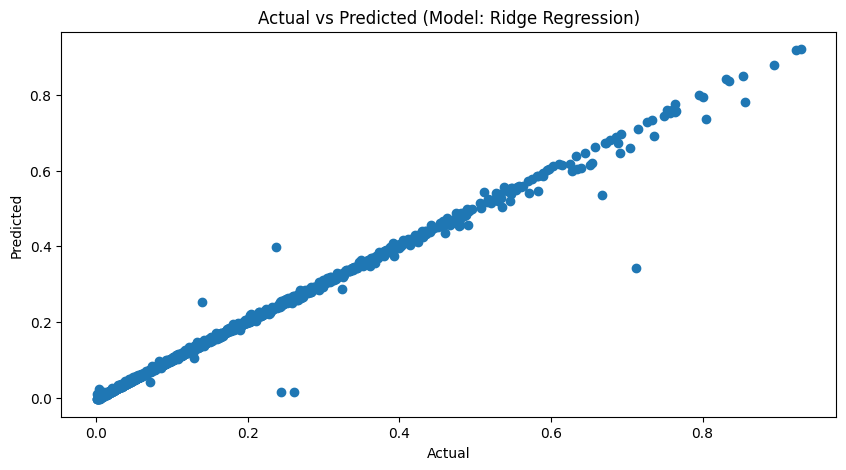


Model: Lasso Regression
Cross-Validation R-squared scores: [-0.00210163 -0.00071848 -0.00113424 -0.00110804]
Mean R-squared (Cross-Validation): -0.00


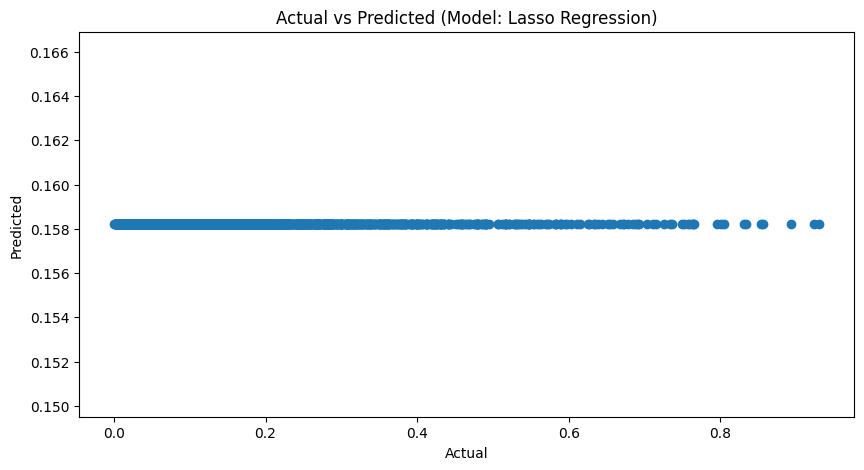


Model: Decision Tree
Cross-Validation R-squared scores: [0.97981776 0.9606225  0.967333   0.96258007]
Mean R-squared (Cross-Validation): 0.97


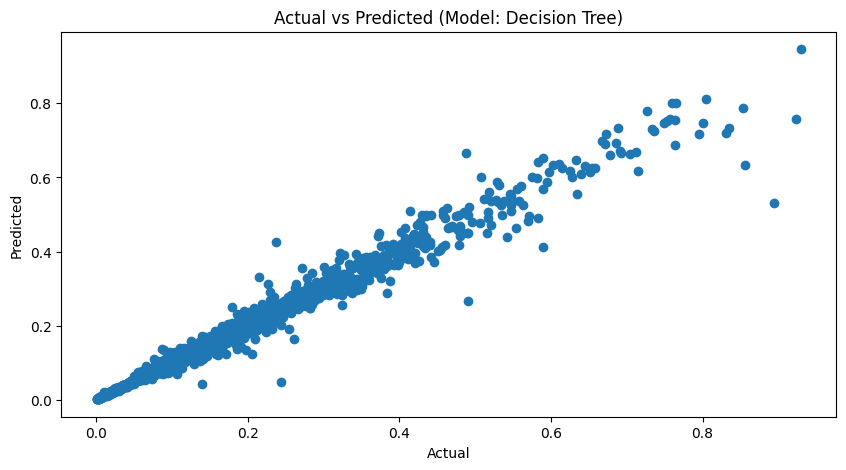

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: 


Model: Random Forest
Cross-Validation R-squared scores: [0.99050361 0.97734587 0.99256682 0.98296183]
Mean R-squared (Cross-Validation): 0.99


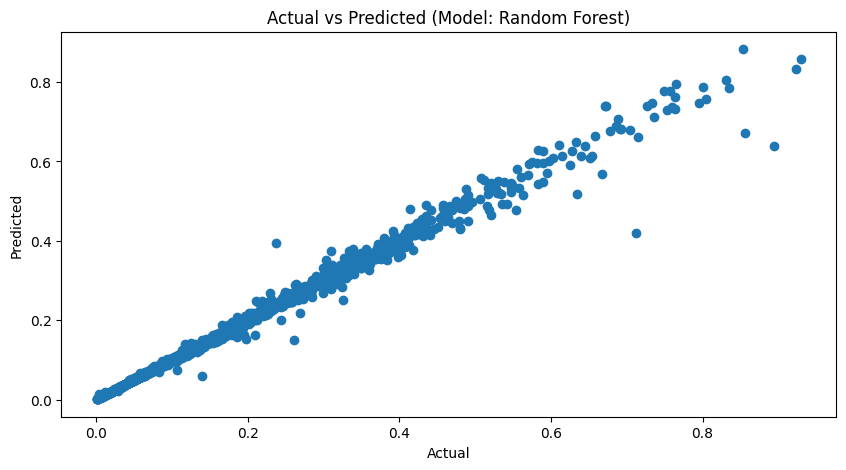

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Py


Model: Gradient Boosting
Cross-Validation R-squared scores: [0.99087909 0.97836745 0.9895873  0.98702391]
Mean R-squared (Cross-Validation): 0.99


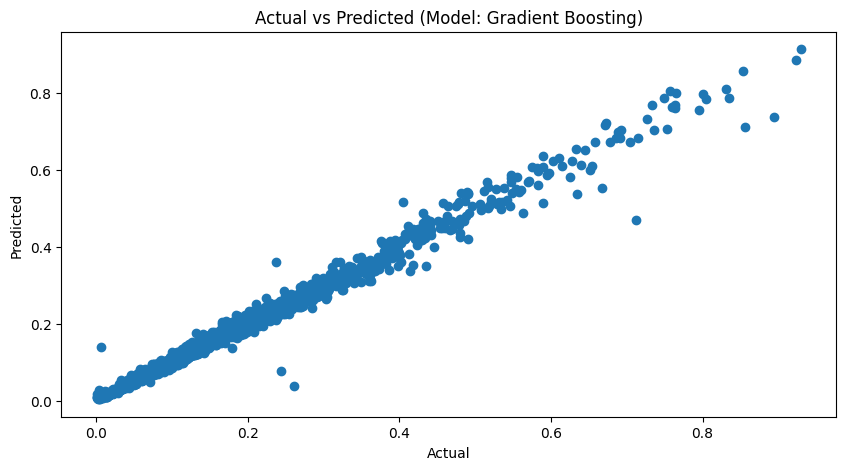

ValueError: feature_names must be string, and may not contain [, ] or <

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
   # 'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    #'LightGBM': LGBMRegressor(),
    #'CatBoost': CatBoostRegressor(verbose=0)
}

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'R2': []}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    
    # Check for overfitting using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='r2')
    print(f"\nModel: {name}")
    print(f"Cross-Validation R-squared scores:", cv_scores)
    print(f"Mean R-squared (Cross-Validation): {np.mean(cv_scores):.2f}")
    
    # Check for overfitting by plotting actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted (Model: {name})")
    plt.show()
    
   

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print results sorted by MSE
print("Results sorted by MSE:")
print(results_df.sort_values(by='MSE'))

# Print results sorted by R2
print("\nResults sorted by R-squared (R2):")
print(results_df.sort_values(by='R2', ascending=False))


In [99]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# Calculate R-squared using cross-validation
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_lr = np.mean(cv_scores_lr)
print("Linear Regression Mean R-squared:", mean_r2_lr)


Linear Regression Mean Squared Error: 0.00020990828358596772
Linear Regression Mean R-squared: 0.995799987689316


In [100]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

# Calculate R-squared using cross-validation
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_rf = np.mean(cv_scores_rf)
print("Random Forest Mean R-squared:", mean_r2_rf)


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Mean Squared Error: 0.00021079197679827383


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: 

Random Forest Mean R-squared: 0.9863770697884309


In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regression model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Calculate Mean Squared Error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)

# Calculate R-squared using cross-validation
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_gb = np.mean(cv_scores_gb)
print("Gradient Boosting Mean R-squared:", mean_r2_gb)


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Mean Squared Error: 0.00025064472970759085


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\hp\AppData\Local\Programs\Py

Gradient Boosting Mean R-squared: 0.9870063553388931


In [102]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

# Calculate R-squared using cross-validation
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_ridge = np.mean(cv_scores_ridge)
print("Ridge Regression Mean R-squared:", mean_r2_ridge)


Ridge Regression Mean Squared Error: 0.00016148497515696054
Ridge Regression Mean R-squared: 0.9904431518572933


In [103]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso = Lasso(alpha=1.0)

# Train the model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

# Calculate R-squared using cross-validation
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_lasso = np.mean(cv_scores_lasso)
print("Lasso Regression Mean R-squared:", mean_r2_lasso)


Lasso Regression Mean Squared Error: 0.019787808672426545
Lasso Regression Mean R-squared: -0.000683653568997089


In [104]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet Regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic_net = elastic_net.predict(X_test)

# Calculate Mean Squared Error
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("ElasticNet Regression Mean Squared Error:", mse_elastic_net)

# Calculate R-squared using cross-validation
cv_scores_elastic_net = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_elastic_net = np.mean(cv_scores_elastic_net)
print("ElasticNet Regression Mean R-squared:", mean_r2_elastic_net)


ElasticNet Regression Mean Squared Error: 0.019787808672426545
ElasticNet Regression Mean R-squared: -0.000683653568997089


In [105]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize K-Nearest Neighbors Regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate Mean Squared Error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("K-Nearest Neighbors Regression Mean Squared Error:", mse_knn)

# Calculate R-squared using cross-validation
cv_scores_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_knn = np.mean(cv_scores_knn)
print("K-Nearest Neighbors Regression Mean R-squared:", mean_r2_knn)


K-Nearest Neighbors Regression Mean Squared Error: 0.0004565751263898405
K-Nearest Neighbors Regression Mean R-squared: 0.9724144602545106


In [106]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regression model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree Regression Mean Squared Error:", mse_dt)

# Calculate R-squared using cross-validation
cv_scores_dt = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_dt = np.mean(cv_scores_dt)
print("Decision Tree Regression Mean R-squared:", mean_r2_dt)


Decision Tree Regression Mean Squared Error: 0.00039146782780455206
Decision Tree Regression Mean R-squared: 0.9671038336788499


In [107]:
from xgboost import XGBRegressor

# Initialize XGBoost Regression model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regression Mean Squared Error:", mse_xgb)

# Calculate R-squared using cross-validation
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2')

# Calculate mean R-squared
mean_r2_xgb = np.mean(cv_scores_xgb)
print("XGBoost Regression Mean R-squared:", mean_r2_xgb)


ValueError: feature_names must be string, and may not contain [, ] or <

In [108]:
pip --version tensorflow

pip 24.0 from C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [111]:
pip install --upgrade tensorflow


  Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached tensorflow-2.16.1-cp312-cp312-win_amd64.whl (2.1 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.0rc0
    Uninstalling tensorflow-2.16.0rc0:
      Successfully uninstalled tensorflow-2.16.0rc0
Note: you may need to restart the kernel to use updated packages.


In [112]:
conda create -n myenv python=3.8
conda activate myenv
pip install tensorflow


SyntaxError: invalid syntax (2915666455.py, line 1)

In [ ]:
pip install --upgrade numpy scipy scikit-learn


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict on the test set
y_pred_nn = model.predict(X_test).flatten()

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Regression Mean Squared Error:", mse_nn)

# Calculate R-squared using cross-validation
def r2_keras(y_true, y_pred):
    SS_res =  np.sum(np.square( y_true - y_pred ))
    SS_tot = np.sum(np.square( y_true - np.mean(y_true) ))
    return ( 1 - SS_res/(SS_tot + np.finfo(float).eps) )

cv_scores_nn = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_keras)

# Calculate mean R-squared
mean_r2_nn = np.mean(cv_scores_nn)
print("Neural Network Regression Mean R-squared:", mean_r2_nn)
